After seeing the overfitting behvaior from the Linear Regression Model, we decided to try out the Random Forest Model. A Random Forest is an ensemble method, comprised of numerous decision trees.

In [2]:
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = quandl.get("WIKI/MSFT")
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0


In [4]:
# Create Features

data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj. Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# y is the target or output variable
y = np.where(data['Adj. Close'].shift(-1) > data['Adj. Close'], 1, -1)

In [5]:
## Split data ##
# data length 
data_length = data.shape[0]

# Training dataset length - where 75% training, 25%
split = int(data_length * 0.75)
split

6053

In [6]:
# x/y train and test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print size of train and test dataset to verify dimensions
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6053, 4) (2018, 4)
(6053,) (2018,)


In [7]:
# Establish and train Random Forest model
rf = RandomForestClassifier(random_state = 5)
model = rf.fit(X_train, y_train)

# Test and find accuracy
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  51.04063429137761


C:\Users\Desmond\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
# View classifcation reports 
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.50      0.62      0.55       991
           1       0.52      0.40      0.46      1027

    accuracy                           0.51      2018
   macro avg       0.51      0.51      0.51      2018
weighted avg       0.51      0.51      0.50      2018



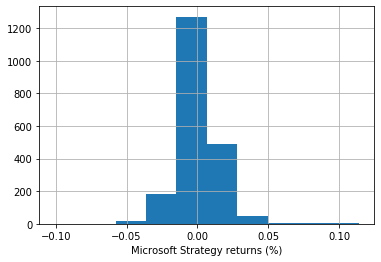

In [10]:
# Create new feature that quantifies returns
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

# Plot Return Histograms
# This plot represents the returns in %, and how often they have occurred.
data.strategy_returns[split:].hist()
plt.xlabel('Microsoft Strategy returns (%)')
plt.show()

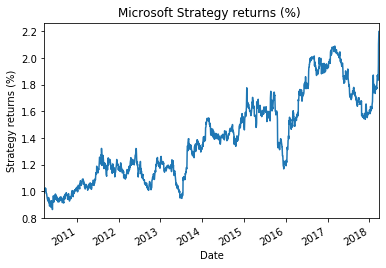

In [11]:
# This plot shows how the returns fluctuate over time.
(data.strategy_returns[split:]+1).cumprod().plot()
plt.title("Microsoft Strategy returns (%) ")
plt.ylabel('Strategy returns (%)')
plt.show()

With an accuracy score much lower than the previous models that we've tested before, the Random Forest shows signs of underfitting, while attaining a decent generalization of the dataset. The graphs created from the output of the model allow an investor to see how often large returns are seen from a certain stock, which can persaude them to invest, or to look elsewhere. 
<br>
Once again, we have built a model that provides us insight, but doesn't give us a viable means to predict the behavior of a stock correctly.